In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TRAIN = './data/Train.csv'
TEST = './data/Test.csv'

Загружаем тренировочные и тестовые данные

In [3]:
train_data = pd.read_csv(TRAIN)
test_data = pd.read_csv(TEST)

In [4]:
train_data.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-01-01,164,1.0,5,50,2,1,20.0,0.0,...,0,0,0,0,0,0,0,0,0,3947000
1,1,2011-01-01,66,NaN,5,48,2,0,20.0,NaN,...,0,0,0,0,0,0,0,0,0,2525000
2,2,2011-01-01,642,2.0,21,61,2,0,10.0,0.0,...,0,0,0,0,0,0,0,0,0,19984000
3,3,2011-01-01,562,1.0,11,95,3,1,10.0,NaN,...,0,0,0,0,0,0,0,0,0,9727000
4,4,2011-01-01,151,NaN,9,34,1,0,20.0,NaN,...,0,0,0,0,0,0,0,0,0,2662000


In [5]:
test_data.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,100000,2012-06-01,459,NaN,6,48,2,0,15.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,100001,2012-06-01,403,0.0,6,32,1,0,10.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,100002,2012-06-01,405,NaN,9,46,2,0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,100003,2012-06-01,314,2.0,10,44,1,0,15.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,100004,2012-06-01,661,0.0,1,47,2,0,20.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Смотрим статистику по тренировочным данным

In [6]:
train_data.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,100000.000000,100000.000000,70042.000000,100000.000000,100000.000000,100000.000000,100000.000000,95107.000000,70242.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,49999.500000,336.877890,0.534436,5.232540,52.230030,2.118770,0.400430,22.034866,0.500384,2.487240,...,0.003640,0.001750,0.000810,0.007980,0.007190,0.002200,0.000290,0.001600,0.000290,4.709459e+06
std,28867.657797,194.234482,0.573261,3.892729,17.652099,0.829573,0.548114,8.314644,0.500003,1.955085,...,0.060223,0.041797,0.028449,0.088974,0.084489,0.046853,0.017027,0.039968,0.017027,3.969739e+06
min,0.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.570000e+05
25%,24999.750000,169.000000,0.000000,2.000000,40.000000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.384000e+06
50%,49999.500000,337.000000,0.000000,4.000000,52.000000,2.000000,0.000000,25.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.739000e+06
75%,74999.250000,506.000000,1.000000,7.000000,60.000000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.700000e+06
max,99999.000000,671.000000,2.000000,25.000000,217.000000,6.000000,2.000000,30.000000,1.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.356700e+07


Есть пропущенные значения у колонок **build_tech**, **metro_dist** и **g_lift**

In [7]:
test_data.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
count,100000.000000,100000.000000,70045.000000,100000.000000,100000.000000,100000.000000,100000.00000,95031.000000,70017.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,149999.500000,335.569620,0.533700,5.242370,52.205050,2.117700,0.39843,21.979722,0.499893,2.488760,...,0.006340,0.003780,0.001280,0.001030,0.007870,0.007760,0.001960,0.000390,0.00144,0.000250
std,28867.657797,194.132348,0.574173,3.913587,17.691186,0.828235,0.54782,8.319946,0.500004,1.958416,...,0.079372,0.061366,0.035754,0.032077,0.088364,0.087749,0.044229,0.019745,0.03792,0.015809
min,100000.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,124999.750000,168.000000,0.000000,2.000000,40.000000,1.000000,0.00000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,149999.500000,337.000000,0.000000,4.000000,52.000000,2.000000,0.00000,25.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,174999.250000,503.000000,1.000000,7.000000,60.000000,3.000000,1.00000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,199999.000000,671.000000,2.000000,25.000000,217.000000,6.000000,2.00000,30.000000,1.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


Есть пропущенные значения у колонок **build_tech**, **metro_dist** и **g_lift**

### Заполнение пропущенных значений

Заполнять пропуски будем на всех данных

In [28]:
all_data = pd.concat([train_data, test_data], ignore_index=True)

Рассмотрим корреляционную матрицу

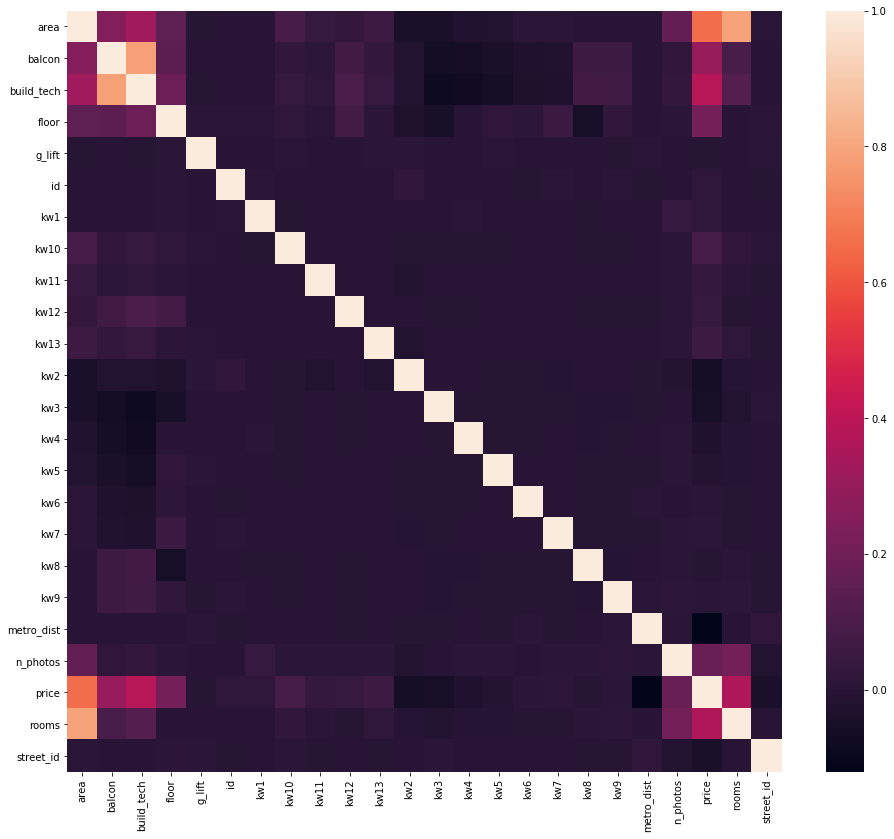

In [29]:
import seaborn as sns
corr = all_data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [30]:
pd.crosstab(all_data['street_id'], all_data['metro_dist'])

metro_dist,0.0,5.0,10.0,15.0,20.0,25.0,30.0
street_id,,,,,,,
0,0,0,48,50,46,49,83
1,0,45,39,46,34,50,45
2,40,40,41,44,37,43,0
3,0,51,33,40,45,49,48
4,0,0,0,0,43,57,172
5,0,0,0,0,0,46,217
6,0,0,0,0,0,44,236
7,0,53,61,46,51,37,34
8,36,45,44,55,51,50,0


### build_tech

In [67]:
abs(corr['build_tech']).sort_values()

id            0.000080
kw1           0.000579
metro_dist    0.001148
street_id     0.001666
g_lift        0.004715
kw11          0.015036
kw2           0.019110
kw7           0.027820
n_photos      0.028162
kw10          0.036925
kw6           0.037254
kw13          0.042089
kw5           0.057367
kw9           0.070508
kw8           0.072481
kw4           0.073462
kw3           0.081900
kw12          0.100876
rooms         0.127477
floor         0.188115
area          0.327066
price         0.382759
balcon        0.784430
build_tech    1.000000
Name: build_tech, dtype: float64

In [68]:
build_tech_features = ['kw5', 'kw9', 'kw8', 'kw4', 'kw3', 'kw12', 'rooms', 'floor', 'area', 'balcon']
build_tech_target = 'build_tech'

In [69]:
all_data.build_tech.value_counts()

0.0    70896
1.0    63566
2.0     5625
Name: build_tech, dtype: int64

In [70]:
build_tech_X = all_data[all_data.build_tech.notnull()][build_tech_features]

In [71]:
build_tech_y = all_data[all_data.build_tech.notnull()][build_tech_target]

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(build_tech_X, build_tech_y, test_size=0.33, random_state=42)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
clf = DecisionTreeClassifier(random_state=42)

In [76]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test, clf.predict(X_test))

0.93845854333859702

In [79]:
all_data.columns

Index(['area', 'balcon', 'build_tech', 'date', 'floor', 'g_lift', 'id', 'kw1',
       'kw10', 'kw11', 'kw12', 'kw13', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6',
       'kw7', 'kw8', 'kw9', 'metro_dist', 'n_photos', 'price', 'rooms',
       'street_id'],
      dtype='object')

In [80]:
all_data.iloc[all_data[all_data.build_tech.isnull()]['build_tech'].index.tolist(),[2]] = clf.predict(all_data[all_data.build_tech.isnull()][build_tech_features])

### metro_dist

In [81]:
all_data.metro_dist.value_counts()

30.0    79669
25.0    32501
20.0    29274
15.0    25867
10.0    19577
5.0     10146
0.0      2966
Name: metro_dist, dtype: int64

In [82]:
abs(corr['metro_dist']).sort_values()

kw10          0.000027
kw8           0.000235
kw13          0.000248
kw11          0.000358
kw1           0.000907
rooms         0.001037
build_tech    0.001148
floor         0.001386
balcon        0.001445
kw4           0.001931
area          0.002466
kw2           0.002613
kw6           0.002920
kw9           0.003716
id            0.003773
kw5           0.003840
g_lift        0.004104
kw12          0.004267
kw3           0.004405
n_photos      0.005119
kw7           0.005395
street_id     0.022002
price         0.120818
metro_dist    1.000000
Name: metro_dist, dtype: float64

In [92]:
metro_dist_features = ['street_id', 'kw7', 'n_photos']
metro_dist_target = 'metro_dist'

In [93]:
metro_dist_X = all_data[all_data.metro_dist.notnull()][metro_dist_features]
metro_dist_y = all_data[all_data.metro_dist.notnull()][metro_dist_target]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(metro_dist_X, metro_dist_y, test_size=0.33, random_state=42)

In [95]:
clf = DecisionTreeClassifier(random_state=42)

In [96]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [97]:
from sklearn.metrics import mean_absolute_error

In [98]:
mean_absolute_error(y_test, clf.predict(X_test))

6.395227272727273

In [99]:
all_data.iloc[all_data[all_data.metro_dist.isnull()]['metro_dist'].index.tolist(),[20]] = clf.predict(all_data[all_data.metro_dist.isnull()][metro_dist_features])

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

In [100]:
all_data.describe()

,area,balcon,build_tech,floor,g_lift,id,kw1,kw10,kw11,kw12,...,kw5,kw6,kw7,kw8,kw9,metro_dist,n_photos,price,rooms,street_id
count,200000.000000,200000.000000,200000.000000,200000.000000,140259.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,1.000000e+05,200000.000000,200000.000000
mean,52.217540,0.399430,0.523490,5.237455,0.500139,99999.500000,0.056680,0.00208,0.000340,0.001520,...,0.003710,0.001515,0.000920,0.007925,0.007475,22.112900,2.488000,4.709459e+06,2.118235,336.223755
std,17.671614,0.547966,0.574465,3.903165,0.500002,57735.171256,0.231231,0.04556,0.018436,0.038958,...,0.060797,0.038894,0.030318,0.088669,0.086135,8.354714,1.956746,3.969739e+06,0.828902,194.184038
min,29.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.570000e+05,1.000000,0.000000
25%,40.000000,0.000000,0.000000,2.000000,0.000000,49999.750000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,2.384000e+06,1.000000,168.000000
50%,52.000000,0.000000,0.000000,4.000000,1.000000,99999.500000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,2.000000,3.739000e+06,2.000000,337.000000
75%,60.000000,1.000000,1.000000,7.000000,1.000000,149999.250000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,4.000000,5.700000e+06,3.000000,505.000000
max,217.000000,2.000000,2.000000,25.000000,1.000000,199999.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,12.000000,8.356700e+07,6.000000,671.000000


### g_lift

In [111]:
all_data.g_lift.describe()

count    140259.000000
mean          0.500139
std           0.500002
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: g_lift, dtype: float64

In [112]:
abs(corr['g_lift']).sort_values()

kw7           0.000008
kw4           0.000022
kw12          0.000194
kw8           0.000532
kw6           0.000738
kw3           0.000787
balcon        0.001296
n_photos      0.001356
kw1           0.001447
id            0.001482
kw11          0.001996
rooms         0.002328
kw5           0.002777
street_id     0.003329
floor         0.003596
kw13          0.003749
area          0.004032
metro_dist    0.004104
kw9           0.004129
kw2           0.004235
build_tech    0.004715
kw10          0.006146
price         0.006694
g_lift        1.000000
Name: g_lift, dtype: float64

In [113]:
abs(corr['g_lift']).sort_values().index

Index(['kw7', 'kw4', 'kw12', 'kw8', 'kw6', 'kw3', 'balcon', 'n_photos', 'kw1',
       'id', 'kw11', 'rooms', 'kw5', 'street_id', 'floor', 'kw13', 'area',
       'metro_dist', 'kw9', 'kw2', 'build_tech', 'kw10', 'price', 'g_lift'],
      dtype='object')

In [129]:
g_lift_features = ['build_tech', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13']
g_lift_target = 'g_lift'
g_lift_X = all_data[all_data.g_lift.notnull()][g_lift_features]
g_lift_y = all_data[all_data.g_lift.notnull()][g_lift_target]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(g_lift_X, g_lift_y, test_size=0.44, random_state=42)

In [151]:
clf = DecisionTreeClassifier(random_state=42)

In [152]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [153]:
accuracy_score(y_test, clf.predict(X_test))

0.49884953171079494

In [155]:
train_data = all_data.iloc[:100000,]

In [157]:
train_data.head()

,area,balcon,build_tech,date,floor,g_lift,id,kw1,kw10,kw11,...,kw5,kw6,kw7,kw8,kw9,metro_dist,n_photos,price,rooms,street_id
0,50,1,1.0,2011-01-01,5,0.0,0,0,0,0,...,0,0,0,0,0,20.0,3,3947000.0,2,164
1,48,0,0.0,2011-01-01,5,NaN,1,0,0,0,...,0,0,0,0,0,20.0,0,2525000.0,2,66
2,61,0,2.0,2011-01-01,21,0.0,2,1,0,0,...,0,0,0,0,0,10.0,0,19984000.0,2,642
3,95,1,1.0,2011-01-01,11,NaN,3,0,0,0,...,0,0,0,0,0,10.0,2,9727000.0,3,562
4,34,0,0.0,2011-01-01,9,NaN,4,0,0,0,...,0,0,0,0,0,20.0,2,2662000.0,1,151


In [158]:
train_data.describe()

,area,balcon,build_tech,floor,g_lift,id,kw1,kw10,kw11,kw12,...,kw5,kw6,kw7,kw8,kw9,metro_dist,n_photos,price,rooms,street_id
count,100000.000000,100000.000000,100000.000000,100000.000000,70242.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,52.230030,0.400430,0.524510,5.232540,0.500384,49999.500000,0.05681,0.002200,0.000290,0.001600,...,0.003640,0.001750,0.000810,0.007980,0.007190,22.139750,2.487240,4.709459e+06,2.118770,336.877890
std,17.652099,0.548114,0.574354,3.892729,0.500003,28867.657797,0.23148,0.046853,0.017027,0.039968,...,0.060223,0.041797,0.028449,0.088974,0.084489,8.351941,1.955085,3.969739e+06,0.829573,194.234482
min,29.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.570000e+05,1.000000,0.000000
25%,40.000000,0.000000,0.000000,2.000000,0.000000,24999.750000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,2.384000e+06,1.000000,169.000000
50%,52.000000,0.000000,0.000000,4.000000,1.000000,49999.500000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,2.000000,3.739000e+06,2.000000,337.000000
75%,60.000000,1.000000,1.000000,7.000000,1.000000,74999.250000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,4.000000,5.700000e+06,3.000000,506.000000
max,217.000000,2.000000,2.000000,25.000000,1.000000,99999.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,12.000000,8.356700e+07,6.000000,671.000000


In [160]:
abs(corr['price']).sort_values().index

Index(['kw8', 'kw9', 'g_lift', 'kw6', 'kw5', 'kw7', 'kw1', 'id', 'kw4', 'kw11',
       'kw12', 'street_id', 'kw3', 'kw13', 'kw2', 'kw10', 'metro_dist',
       'n_photos', 'floor', 'balcon', 'rooms', 'build_tech', 'area', 'price'],
      dtype='object')

In [239]:
features = ['street_id', 'kw3', 'kw13', 'kw2', 'kw10', 'metro_dist', 'n_photos', 'floor', 'balcon', 'rooms', 'build_tech', 'area']
target = 'price'

In [240]:
X = train_data[features]
y = train_data[target]

In [241]:
from sklearn.preprocessing import normalize

In [242]:
X = normalize(X)

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
from sklearn.linear_model import LinearRegression

In [229]:
regressor = LinearRegression()

In [230]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [231]:
regressor.predict(X_test)

array([ 4722730.83025289,  4730452.16298369,  4589692.11554976, ...,
        4722496.56703086,  4659898.40077267,  4677519.50307677])

In [232]:
from sklearn.metrics import mean_absolute_error

In [233]:
mean_absolute_error(y_test, regressor.predict(X_test))

2459705.3014110732

In [234]:
from xgboost import XGBRegressor

In [267]:
rgr = XGBRegressor(max_depth=10, n_estimators=1000, learning_rate=0.01)

In [268]:
rgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [269]:
mean_absolute_error(y_test, rgr.predict(X_test))

1405202.5592437501

In [270]:
rgr.score(X_test, y_test)

0.64334153351672052